# Notebook to visualize VCR Data

First try

In [1]:
from pathlib import Path
import jsonlines as jsnl
import json
from tqdm import tqdm_notebook as tqdm

In [2]:
import matplotlib
matplotlib.use('agg')

In [3]:
%matplotlib inline

In [4]:
import PIL

In [5]:
vcr_tdir = Path('../data/vcr1/')

In [6]:
vcr_imgs = vcr_tdir / 'vcr1images'

In [7]:
train_file = vcr_tdir / 'train.jsonl'

In [8]:
train_ann = jsnl.Reader(open(train_file))

In [9]:
t1 = []
for t in tqdm(train_ann.iter()):
#     print(t)
    t1.append(t)

In [10]:
len(t1)

212923

In [ ]:
ann1 = t1[0]

In [ ]:
ann1

In [ ]:
ann1.keys()

In [ ]:
ann1['objects']

In [ ]:
img = PIL.Image.open(vcr_imgs / ann1['img_fn'])

In [ ]:
img

In [ ]:
metd = json.load(open(str(vcr_imgs / ann1['metadata_fn'])))

In [ ]:
metd.keys()

In [ ]:
metd['names']

In [ ]:
metd['boxes'][3]

In [ ]:
poly1 = metd['segms'][-1][0]

In [ ]:
p1 = [tuple(x) for x in poly1]

In [ ]:
draw = PIL.ImageDraw.Draw(img, 'RGBA')

In [ ]:
draw.polygon(p1, fill=(255, 0, 0, 128), outline=(0, 0, 0, 128))

In [ ]:
img

### Import from File

In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
from visualizer import Visualizer

In [52]:
vis = Visualizer(vcr_tdir, t1[214])

In [53]:
img, mask_img, odct = vis.get_img(), vis.get_mask_ann_img(), vis.get_QAR()

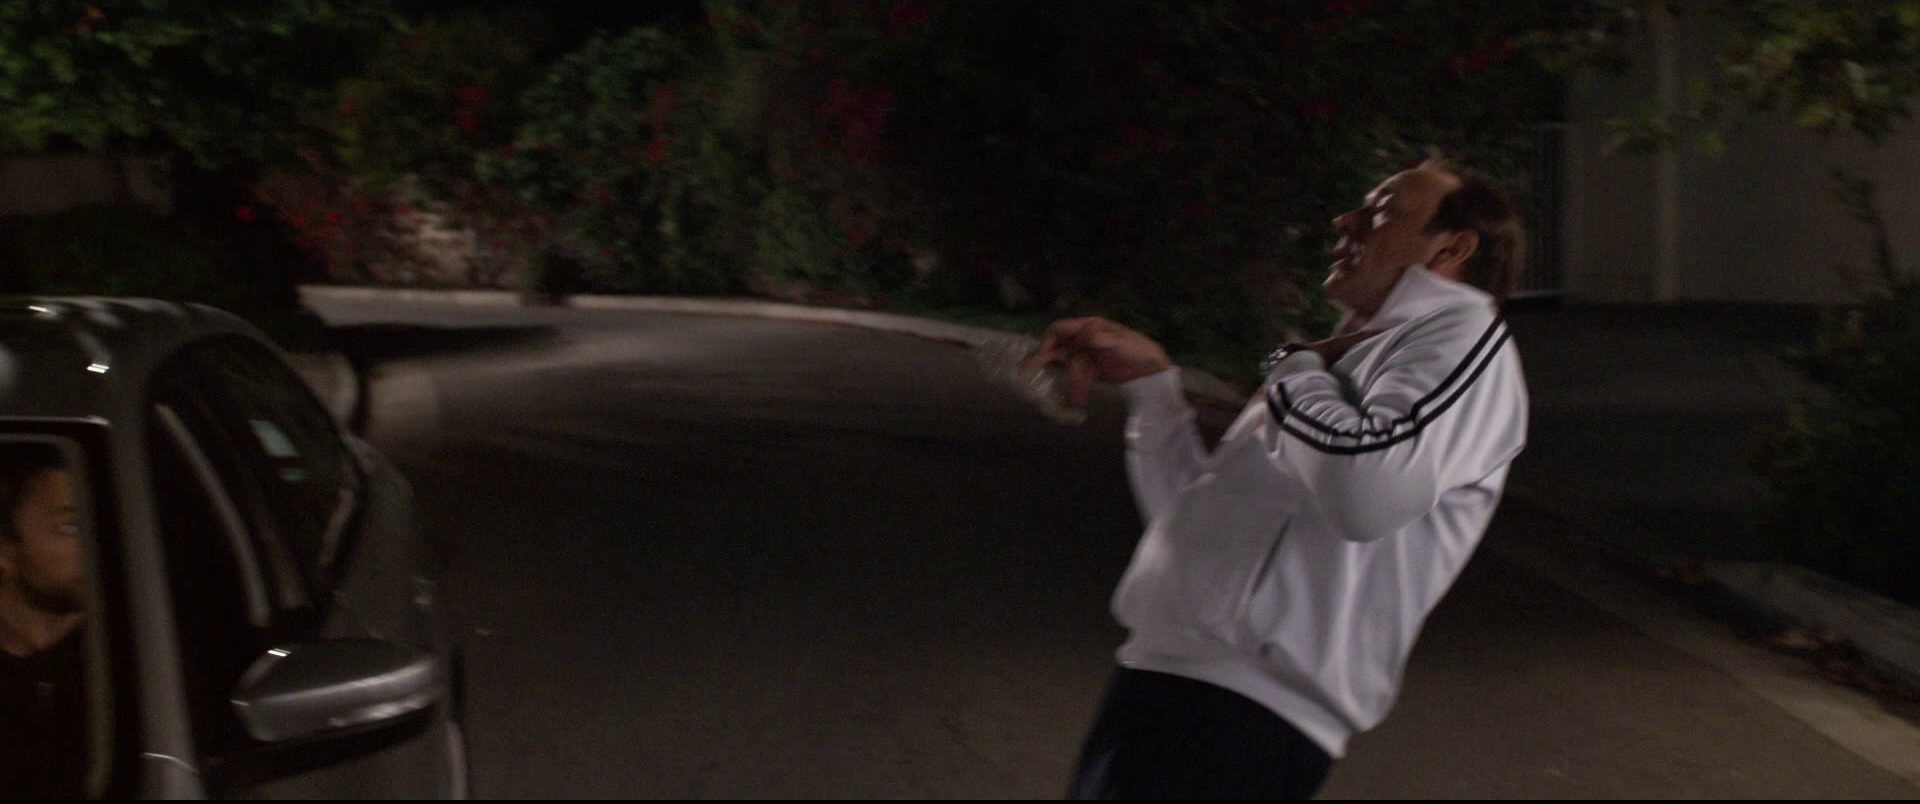

In [54]:
img

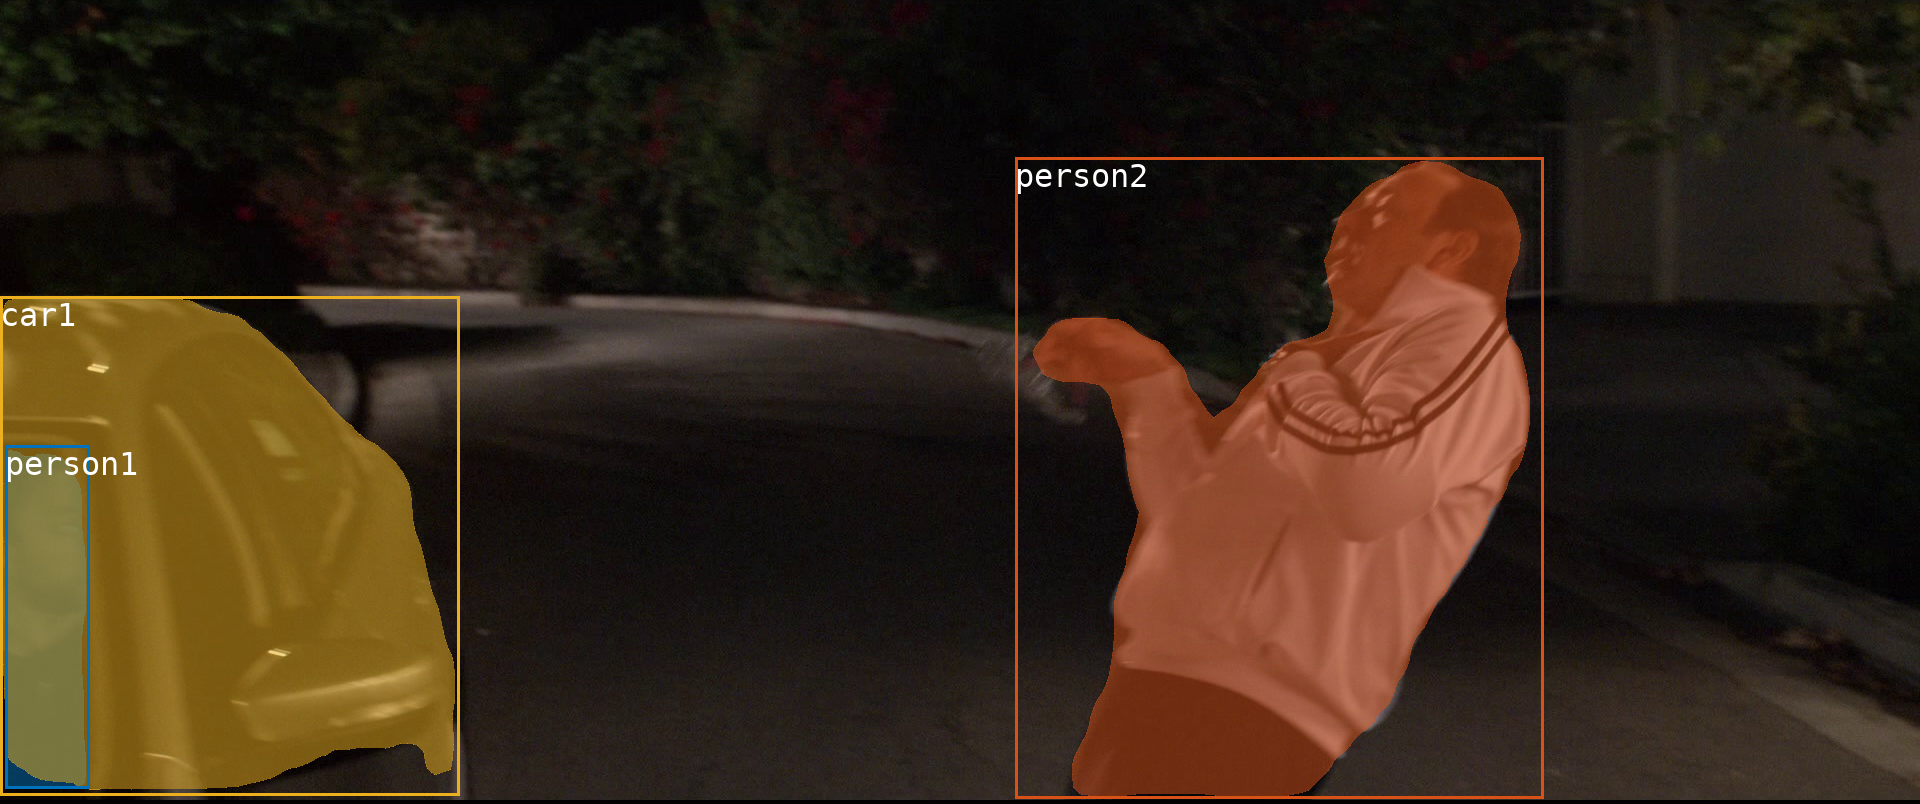

In [55]:
mask_img

In [56]:
odct

OrderedDict([('question', 'What will person1 do next ?'),
             ('answer_choices',
              ['person1 will get inside of car1 .',
               'person1 will call security on car1 .',
               'person2 will say hello .',
               'Get out of car and try to help person2 .']),
             ('answer_label', 3),
             ('rationale_choices',
              ['In busy cities , drivers are generally more concerned with damage to their cars than the person that was hit , the driver will need to assess the damage and possibly see if someone is okay .',
               'person2 is running in the road .',
               'person2 is facing person1 , and people sometimes help folks whose cars have broken down .',
               'It is considered good to try and help someone in need they must get out of the car to do this .']),
             ('rationale_label', 3)])

In [57]:
t1[1]['question']

['Do', [1, 2], 'work', 'together', '?']